In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats.stats import pearsonr
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler



In [75]:
# Hiển thị data
data_first = pd.read_csv('data/Case_study_CarPrice_Assignment.csv', encoding = 'utf-8')
data_first

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [76]:
data_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

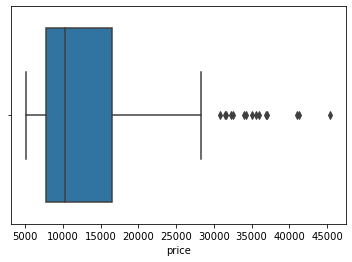

In [77]:
sns.boxplot(data_first['price'])
#kiểm tra giá trị ngoại lai cho biến price đang cần phân tích

In [78]:
# Sử dụng zcore để loại bỏ ngoại lai vs price
data_first['zscore']=(data_first.price - data_first.price.mean())/data_first.price.std()



In [79]:
data = data_first[(data_first.zscore>-3)&(data_first.zscore<3)]
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,zscore
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0.027324
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0.403473
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0.403473
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0.084279
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0.522389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,0.446659
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,0.722042
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,1.027468
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,1.150765


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

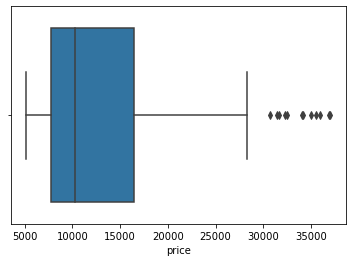

In [80]:
sns.boxplot(data['price'])


## 1.Mối liên hệ giữa hãng xe và tên xe, phát hiện và sửa sai dữ liệu

In [81]:
# Xem cột Carname ta thấy hãng xe và tên xe đi liền nhau 
#--> cần phải tách hãng xe và tên xe ra
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 4', 'mazda

In [82]:
name = data['CarName'].str.split() # Tách cột Carname
data['name']=name.str[0] # Tạo cột name là tên hãng xe
data['Namecar']=name.str[1] # tạo cột Namecar là tên model xe
name.str[0].unique() # Hiện thị tên các hãng xe

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16884\3057040168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['name']=name.str[0] # Tạo cột name là tên hãng xe
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16884\3057040168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Namecar']=name.str[1] # tạo cột Namecar là tên model xe


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [83]:
# Ta dễ thấy có một số hãng xe bị trùng nhưng khi nhập lại khác nhau nên ta đưa về lại thành 1 hãng
data['name'] = data['name'].replace(['maxda'], 'mazda')
data['name'] = data['name'].replace(['Nissan'], 'nissan')
data['name'] = data['name'].replace(['porcshce'], 'porsche')
data['name'] = data['name'].replace(['toyouta'], 'toyota')
data['name'] = data['name'].replace(['vw','vokswagen'], 'volkswagen')


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16884\2753506077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['name'] = data['name'].replace(['maxda'], 'mazda')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16884\2753506077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['name'] = data['name'].replace(['Nissan'], 'nissan')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16884\2753506077.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [84]:
data['name'].unique() # Hiển thị tên hãng xe sau khi đã fix

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [85]:
name.str[2].unique() # Hiển thị tên các model xe

array([nan, 'ls', '(diesel)', 'carlo', '2300', 'se', '(sw)', 'hardtop',
       'custom', 'cvcc', 'lx', '1500', '1300', '(auto)', 'V-Cross',
       'deluxe', 'coupe', 'gs', '4', '225', 'luxus', 'isuzu', 'g4',
       'turbo', 'iii', 'gran', 'gtl', 'mark', '1200', '1600', 'ii',
       'liftback', 'gt', 'tercel', '111', '3', 'beetle'], dtype=object)

## 2.Vẽ biểu đồ và tiến hành kiểm định mối quan hệ các thuộc tính với giá cả 

In [86]:
data_1 =data.iloc[:,1:-1].select_dtypes(['int', 'float'])
data_1

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,zscore
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0.027324
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0.403473
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0.403473
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0.084279
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0.522389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0,0.446659
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0,0.722042
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0,1.027468
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0,1.150765


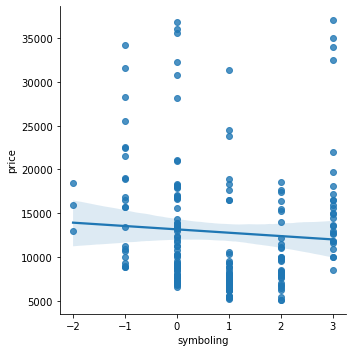

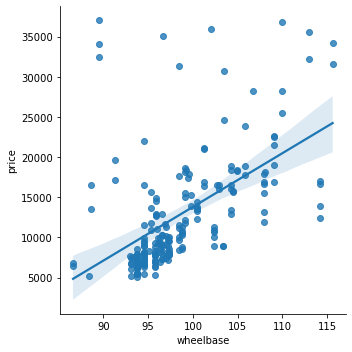

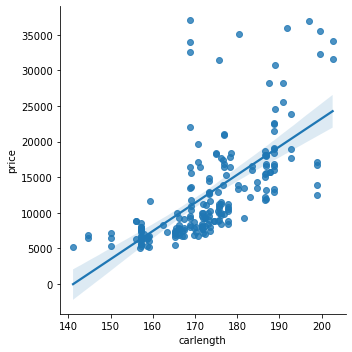

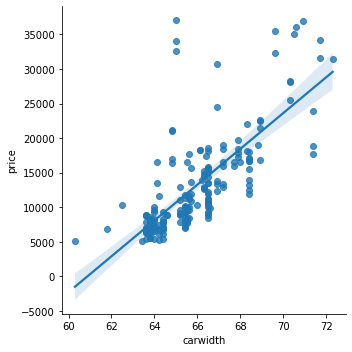

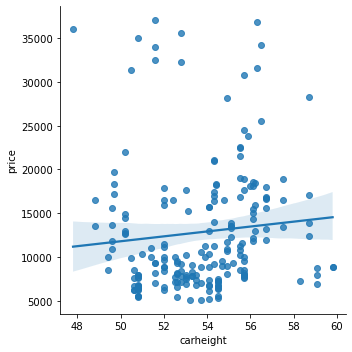

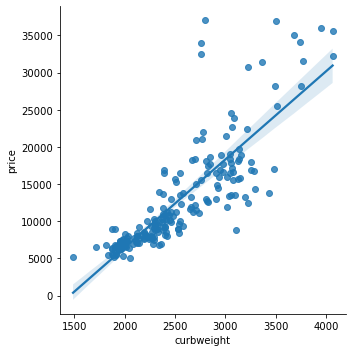

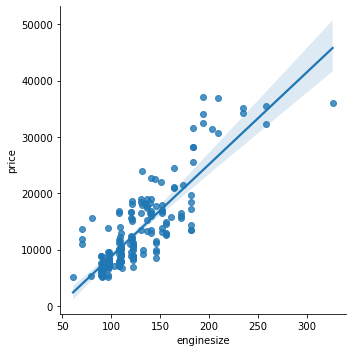

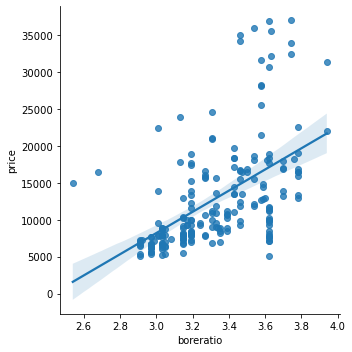

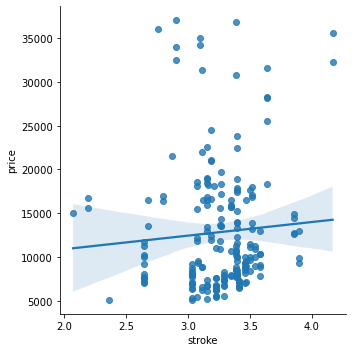

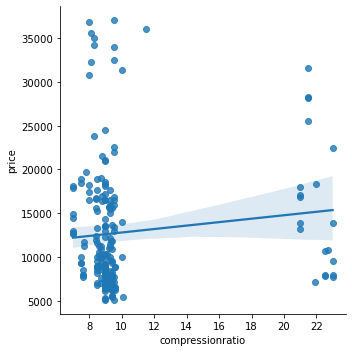

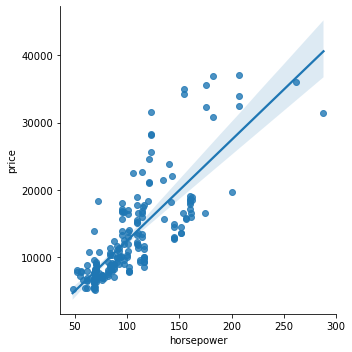

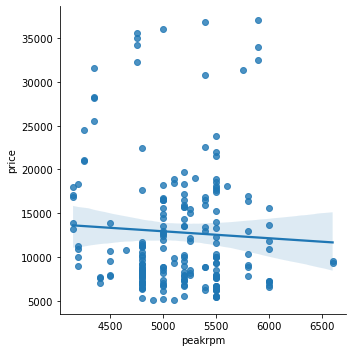

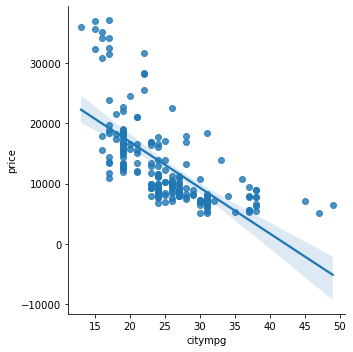

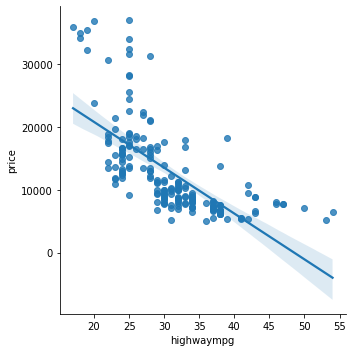

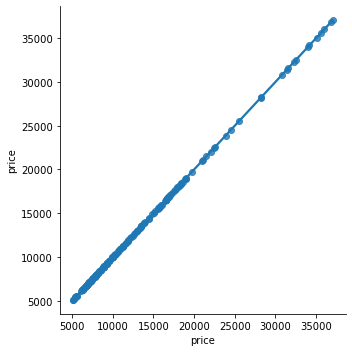

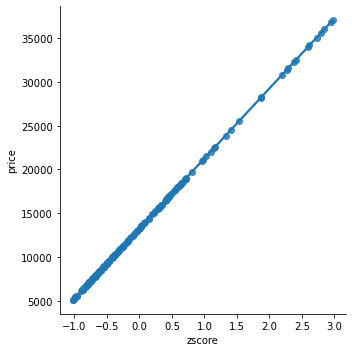

In [87]:
# Dùng lmplot thể hiện xu hướng mối quan hệ các thuộc tính vs giá cả
for col in data_1.columns:
    sns.lmplot(data = data, x= col, y = 'price')
    plt.show()

## Trước khi kiểm định ta thấy có rất nhiều thuộc tính ta dùng corr() để xem độ liên quan của các thuộc tính với giá cả


In [88]:
correlation = data.iloc[:,1:].corr() # Dùng hàn corr() để tìm các thuộc tính có quan hệ chặc với giá cả
correlation.price.sort_values()

highwaympg         -0.685184
citympg            -0.681856
symboling          -0.066599
peakrpm            -0.052572
stroke              0.068005
carheight           0.095369
compressionratio    0.109333
boreratio           0.535374
wheelbase           0.536925
carlength           0.657932
carwidth            0.746627
horsepower          0.806187
curbweight          0.833984
enginesize          0.852069
zscore              1.000000
price               1.000000
Name: price, dtype: float64

In [89]:
# Ở đây ta chọn một vài thuộc tính đặc trưng nhất có quan hệ thuận và nghịch
# GT: H0: 2 thuộc tính ko có mối liên hệ
#     H1: 2 thuộc tính có mối liên hệ
# Đặc trưng thuận với price
r, pvalue = pearsonr(data.enginesize, data.price)
print('r = ', r)
print('pvalue = ', pvalue)

r =  0.852068970776209
pvalue =  3.901604830084587e-58


In [90]:
r, pvalue = pearsonr(data.curbweight, data.price)
print('r = ', r)
print('pvalue = ', pvalue)

r =  0.8339836881525549
pvalue =  1.5254974400626955e-53


## Ta thấy cả 2 TH đều có p ~0 vậy bác bỏ giá thuyết H0 chấp nhậ H1. cả 2 thuộc tính đều có quan hệ rất chặc chẽ với giá cả

In [91]:
# Tương tự ta tiến hành kiểm định với đặc trưng nghịch
# GT: H0: 2 thuộc tính ko có mối liên hệ
#     H1: 2 thuộc tính có mối liên hệ

r, pvalue = pearsonr(data.highwaympg, data.price)
print('r = ', r)
print('pvalue = ', pvalue)


r =  -0.6851837417769658
pvalue =  2.4161263743182874e-29


In [92]:
r, pvalue = pearsonr(data.citympg,data.price)
print('r = ', r)
print('pvalue = ', pvalue)

r =  -0.6818560862164094
pvalue =  5.701565243805607e-29


In [93]:
correlation.price.sort_values()

highwaympg         -0.685184
citympg            -0.681856
symboling          -0.066599
peakrpm            -0.052572
stroke              0.068005
carheight           0.095369
compressionratio    0.109333
boreratio           0.535374
wheelbase           0.536925
carlength           0.657932
carwidth            0.746627
horsepower          0.806187
curbweight          0.833984
enginesize          0.852069
zscore              1.000000
price               1.000000
Name: price, dtype: float64

In [94]:
# Tương tự vậy dùng vòng lặp để ktra tất cả xem có thuộc tính nào ko liên quan với price
r_peakrpm, pvalue_peakrpm = pearsonr(data.peakrpm,data.price)
r_symboling, pvalue_symboling = pearsonr(data.symboling,data.price)
r_compressionratio, pvalue_compressionratio = pearsonr(data.compressionratio,data.price)
r_stroke, pvalue_stroke = pearsonr(data.stroke,data.price)
r_carheight, pvalue_carheight = pearsonr(data.carheight,data.price)

r_boreratio, pvalue_boreratio = pearsonr(data.boreratio,data.price)
r_wheelbase, pvalue_wheelbase = pearsonr(data.wheelbase,data.price)
r_carlength, pvalue_carlength = pearsonr(data.carlength,data.price)

r_carwidth, pvalue_carwidth = pearsonr(data.carwidth,data.price)
r_horsepower, pvalue_horsepower = pearsonr(data.horsepower,data.price)

print('pvalue peakrpm = ', pvalue_peakrpm)
print('pvalue symboling = ', pvalue_symboling)
print('pvalue compressionratio = ', pvalue_compressionratio)
print('pvalue stroke = ', pvalue_stroke)
print('pvalue carheight = ', pvalue_carheight)

print('pvalue boreratio = ', pvalue_boreratio)
print('pvalue wheelbase = ', pvalue_wheelbase)
print('pvalue carlength = ', pvalue_carlength)

print('pvalue carwidth = ', pvalue_carwidth)
print('pvalue horsepower = ', pvalue_horsepower)

pvalue peakrpm =  0.45743912370010686
pvalue symboling =  0.34633876311459966
pvalue compressionratio =  0.12140224094289813
pvalue stroke =  0.3362257380348828
pvalue carheight =  0.17697721104484496
pvalue boreratio =  2.232606970743128e-16
pvalue wheelbase =  1.762916635016602e-16
pvalue carlength =  1.9855744904271013e-26
pvalue carwidth =  2.9660789138061085e-37
pvalue horsepower =  1.810561007077544e-47


### Kiểm định 5% thì với p< 0.05 có chiều dài xe và công suất, chiều ngang xe, số xylanh xe sẽ ảnh hưởng đến giá. Còn các thành phần kia ko quá ảnh hưởng

## Tổng kết lại sẽ có các thành phần sau ảnh hưởng đến giá bán: 
## 1. Enginesize
## 2. Curbweight
## 3. Horsepower
## 4. Carwidth
## 5. Carlength
## 6. Highwaympg 
## 7. Citympg 
## 8. Wheelbase
## 9. Boreratio









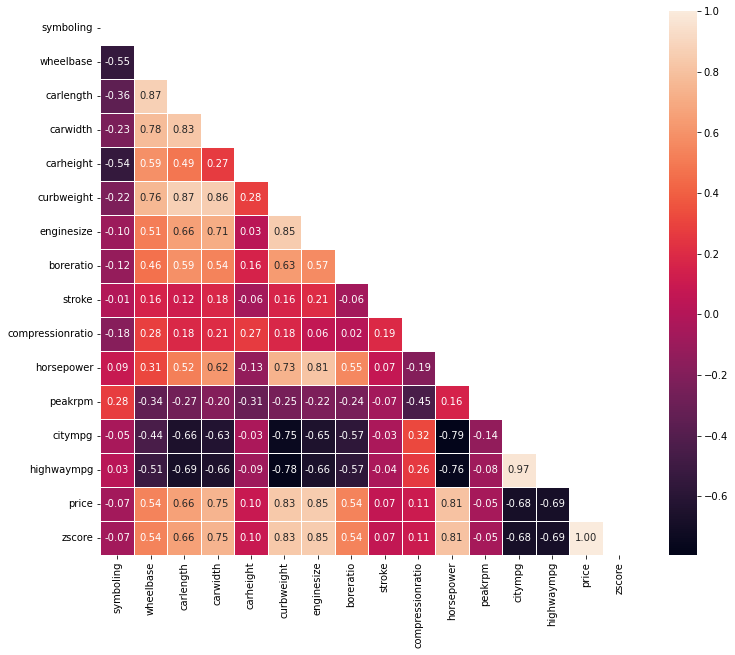

In [95]:
# Biểu đồ heatmap của tất cả các yếu tố vs giá cả
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation))
ax = sns.heatmap(correlation, annot=True, mask = mask, annot_kws={'fontsize':10}, linewidths=0.5, fmt='0.2f')
plt.show()

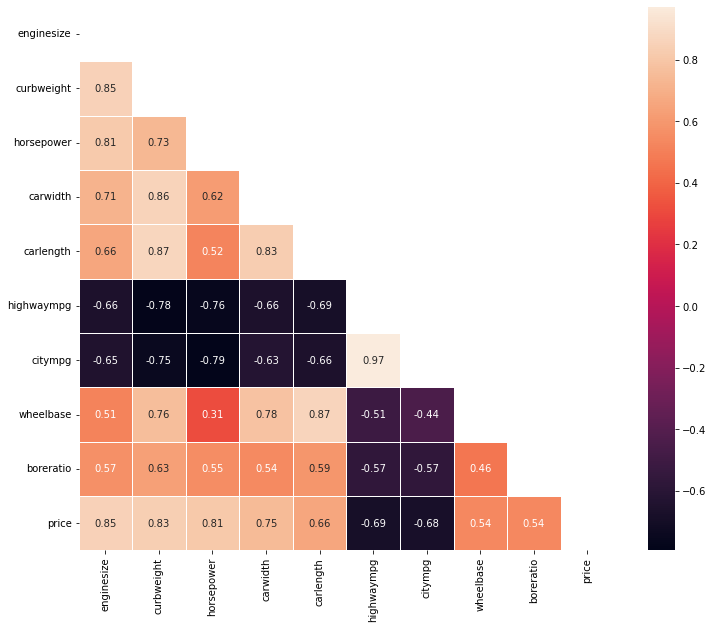

In [96]:
# Biểu đồ heatmap của các yếu tố ảnh hướng mạnh vs giá cả
correlation_1=data[['enginesize','curbweight','horsepower','carwidth','carlength','highwaympg','citympg','wheelbase','boreratio','price']].corr()
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_1))
ax = sns.heatmap(correlation_1, annot=True, mask = mask, annot_kws={'fontsize':10}, linewidths=0.5, fmt='0.2f')
plt.show()

# 3. Xây dựng mô hình hồi quy tuyến tính bằng sklearn

In [97]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,zscore,name,Namecar
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,0.027324,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,0.403473,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,0.403473,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,0.084279,audi,100
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,0.522389,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,3.15,9.5,114,5400,23,28,16845.0,0.446659,volvo,145e
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,3.15,8.7,160,5300,19,25,19045.0,0.722042,volvo,144ea
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,2.87,8.8,134,5500,18,23,21485.0,1.027468,volvo,244dl
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,3.40,23.0,106,4800,26,27,22470.0,1.150765,volvo,246


In [98]:
def print_unique_col_value(data):
    for column in data:
        if data[column].dtypes == 'object':
            print(f'{column}:{data[column].unique()}')

In [99]:
print_unique_col_value(data)

CarName:['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel isuzu d

In [100]:
# Do mô hình ko cần quá nhiều feature nên ta lọc bớt một số cột:
data.drop(['CarName','Namecar'], axis=1,inplace=True)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16884\1008817801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['CarName','Namecar'], axis=1,inplace=True)


In [101]:
print_unique_col_value(data)

fueltype:['gas' 'diesel']
aspiration:['std' 'turbo']
doornumber:['two' 'four']
carbody:['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel:['rwd' 'fwd' '4wd']
enginelocation:['front' 'rear']
enginetype:['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber:['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem:['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
name:['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [102]:
data_model = data

In [103]:
# trong data_model drop hết các feature định lượng để ta định tính lát corr xem định tính nào ảnh hượng mạnh đến price
data_model.drop(['highwaympg','symboling','car_ID','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','zscore','name'], axis=1,inplace=True)



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16884\736187382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model.drop(['highwaympg','symboling','car_ID','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','zscore','name'], axis=1,inplace=True)


In [104]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 204
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fueltype        202 non-null    object 
 1   aspiration      202 non-null    object 
 2   doornumber      202 non-null    object 
 3   carbody         202 non-null    object 
 4   drivewheel      202 non-null    object 
 5   enginelocation  202 non-null    object 
 6   enginetype      202 non-null    object 
 7   cylindernumber  202 non-null    object 
 8   fuelsystem      202 non-null    object 
 9   price           202 non-null    float64
dtypes: float64(1), object(9)
memory usage: 17.4+ KB


## Covert các yếu tố định tính mà chỉ có 2 thuộc tính thành 0 hoặc 1

In [105]:
data_model['fueltype'].replace({'gas':0,'diesel':1}, inplace = True)
data_model['aspiration'].replace({'std':0,'turbo':1}, inplace = True)
data_model['doornumber'].replace({'two':0,'four':1}, inplace = True)
data_model['enginelocation'].replace({'front':0,'rear':1}, inplace = True)



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16884\2738909209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['fueltype'].replace({'gas':0,'diesel':1}, inplace = True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16884\2738909209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['aspiration'].replace({'std':0,'turbo':1}, inplace = True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16884\2738909209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [106]:
data_model

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price
0,0,0,0,convertible,rwd,0,dohc,four,mpfi,13495.0
1,0,0,0,convertible,rwd,0,dohc,four,mpfi,16500.0
2,0,0,0,hatchback,rwd,0,ohcv,six,mpfi,16500.0
3,0,0,1,sedan,fwd,0,ohc,four,mpfi,13950.0
4,0,0,1,sedan,4wd,0,ohc,five,mpfi,17450.0
...,...,...,...,...,...,...,...,...,...,...
200,0,0,1,sedan,rwd,0,ohc,four,mpfi,16845.0
201,0,1,1,sedan,rwd,0,ohc,four,mpfi,19045.0
202,0,0,1,sedan,rwd,0,ohcv,six,mpfi,21485.0
203,1,1,1,sedan,rwd,0,ohc,six,idi,22470.0


In [107]:
def Cre_Dummies (column_object, df, drop_first_bool = False):
    dummies = pd.get_dummies(df[column_object], prefix =column_object, drop_first = drop_first_bool)
    df= pd.concat([df, dummies], axis = 1)
    df.drop([column_object], axis =1, inplace = True)
    return df

In [108]:

data_model = Cre_Dummies('carbody',data_model,True)
data_model = Cre_Dummies('drivewheel',data_model,True)

data_model = Cre_Dummies('enginetype',data_model,True)
data_model = Cre_Dummies('cylindernumber',data_model,True)
data_model = Cre_Dummies('fuelsystem',data_model,True)




In [109]:
column_to_move = data_model.pop("price")

In [110]:
data_model.insert(0, "price", column_to_move)

In [111]:
data_model

,price,fueltype,aspiration,doornumber,enginelocation,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,13495.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,16500.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,16500.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,13950.0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,17450.0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
201,19045.0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
202,21485.0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
203,22470.0,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [112]:
correlation_model = data_model.corr()
correlation_model.price.sort_values(ascending = False).round(2)






price                    1.00
drivewheel_rwd           0.64
fuelsystem_mpfi          0.52
cylindernumber_six       0.50
enginelocation           0.37
enginetype_ohcv          0.30
cylindernumber_five      0.29
aspiration               0.23
cylindernumber_twelve    0.23
enginetype_dohcv         0.18
carbody_hardtop          0.16
fueltype                 0.14
fuelsystem_idi           0.14
carbody_sedan            0.12
doornumber               0.07
enginetype_l             0.06
enginetype_ohcf          0.04
cylindernumber_two       0.00
enginetype_rotor         0.00
fuelsystem_mfi           0.00
fuelsystem_4bbl         -0.01
fuelsystem_spfi         -0.02
carbody_wagon           -0.02
fuelsystem_spdi         -0.06
cylindernumber_three    -0.08
carbody_hatchback       -0.25
enginetype_ohc          -0.34
fuelsystem_2bbl         -0.52
drivewheel_fwd          -0.61
cylindernumber_four     -0.69
Name: price, dtype: float64

In [113]:
r_drivewheel_rwd, pvalue_drivewheel_rwd = pearsonr(data_model.drivewheel_rwd,data_model.price)
r_cylindernumber_four, pvalue_cylindernumber_four = pearsonr(data_model.cylindernumber_four,data_model.price)
r_fuelsystem_mpfi, pvalue_fuelsystem_mpfi = pearsonr(data_model.fuelsystem_mpfi,data_model.price)

print('pvalue drivewhell = ', pvalue_drivewheel_rwd)
print('pvalue cylindernumber = ', pvalue_cylindernumber_four)
print('pvalue fuelsystem = ', pvalue_cylindernumber_four)

pvalue drivewhell =  5.13209470284799e-25
pvalue cylindernumber =  2.4631229458341548e-29
pvalue fuelsystem =  2.4631229458341548e-29


In [114]:
data_model.drop(['price','enginelocation','enginetype_ohcv','aspiration','enginetype_dohcv','carbody_hardtop','carbody_sedan','doornumber','enginetype_l','enginetype_ohcf','enginetype_rotor','carbody_wagon','carbody_hatchback','enginetype_ohc'], axis=1,inplace=True)

In [115]:
data_model

,fueltype,drivewheel_fwd,drivewheel_rwd,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
201,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
202,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
203,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0


## Vậy ta thêm 3 yếu tố định tính vào model gồm drive wheel, cylinder number, fuel system
## Còn chọn 5 yếu tố định lượng vào model gồm: enginesize, curbweight, horsepower, carwidth, highwaympg 


In [155]:
data = data_first[(data_first.zscore>-3)&(data_first.zscore<3)]
data_1 =data.iloc[:,1:-1].select_dtypes(['int', 'float'])
data_1


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [156]:
# Tiến hành Minmax Scaler các biến định lượng về 0-1
data_to_scale = ['enginesize','curbweight','horsepower','carwidth','highwaympg','price']
scaler = MinMaxScaler()
data_1[data_to_scale] = scaler.fit_transform(data_1[data_to_scale])

In [157]:
data_1

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,0.316667,48.8,0.411171,0.260377,3.47,2.68,9.0,0.262500,5000,21,0.270270,0.262520
1,3,88.6,168.8,0.316667,48.8,0.411171,0.260377,3.47,2.68,9.0,0.262500,5000,21,0.270270,0.356691
2,1,94.5,171.2,0.433333,52.4,0.517843,0.343396,2.68,3.47,9.0,0.441667,5000,19,0.243243,0.356691
3,2,99.8,176.6,0.491667,54.3,0.329325,0.181132,3.19,3.40,10.0,0.225000,5500,24,0.351351,0.276778
4,2,99.4,176.6,0.508333,54.3,0.518231,0.283019,3.19,3.40,8.0,0.279167,5500,18,0.135135,0.386462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,0.716667,55.5,0.567882,0.301887,3.78,3.15,9.5,0.275000,5400,23,0.297297,0.367502
201,-1,109.1,188.8,0.708333,55.5,0.605508,0.301887,3.78,3.15,8.7,0.466667,5300,19,0.216216,0.436446
202,-1,109.1,188.8,0.716667,55.5,0.591156,0.422642,3.58,2.87,8.8,0.358333,5500,18,0.162162,0.512911
203,-1,109.1,188.8,0.716667,55.5,0.670675,0.316981,3.01,3.40,23.0,0.241667,4800,26,0.270270,0.543779


In [158]:
data_1.drop(['symboling','wheelbase','carlength','carheight','boreratio','stroke','compressionratio','peakrpm','citympg'], axis=1,inplace=True)

In [159]:
data_1

,carwidth,curbweight,enginesize,horsepower,highwaympg,price
0,0.316667,0.411171,0.260377,0.262500,0.270270,0.262520
1,0.316667,0.411171,0.260377,0.262500,0.270270,0.356691
2,0.433333,0.517843,0.343396,0.441667,0.243243,0.356691
3,0.491667,0.329325,0.181132,0.225000,0.351351,0.276778
4,0.508333,0.518231,0.283019,0.279167,0.135135,0.386462
...,...,...,...,...,...,...
200,0.716667,0.567882,0.301887,0.275000,0.297297,0.367502
201,0.708333,0.605508,0.301887,0.466667,0.216216,0.436446
202,0.716667,0.591156,0.422642,0.358333,0.162162,0.512911
203,0.716667,0.670675,0.316981,0.241667,0.270270,0.543779


In [160]:
#data_model.drop('price', axis=1,inplace=True)

In [161]:
data_final = data_1.join(data_model)
data_final

,carwidth,curbweight,enginesize,horsepower,highwaympg,price,fueltype,drivewheel_fwd,drivewheel_rwd,cylindernumber_five,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.316667,0.411171,0.260377,0.262500,0.270270,0.262520,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.316667,0.411171,0.260377,0.262500,0.270270,0.356691,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.433333,0.517843,0.343396,0.441667,0.243243,0.356691,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.491667,0.329325,0.181132,0.225000,0.351351,0.276778,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.508333,0.518231,0.283019,0.279167,0.135135,0.386462,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.716667,0.567882,0.301887,0.275000,0.297297,0.367502,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
201,0.708333,0.605508,0.301887,0.466667,0.216216,0.436446,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
202,0.716667,0.591156,0.422642,0.358333,0.162162,0.512911,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
203,0.716667,0.670675,0.316981,0.241667,0.270270,0.543779,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [162]:
Q1 = data_final['price'].quantile(0.25)
Q3 = data_final['price'].quantile(0.75)
IQR = Q3 - Q1

data_final = data_final[(data_final['price'] > (Q1 - 1.5*IQR)) & (data_final['price'] < (Q3 + 1.5*IQR))]
data_final

,carwidth,curbweight,enginesize,horsepower,highwaympg,price,fueltype,drivewheel_fwd,drivewheel_rwd,cylindernumber_five,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.316667,0.411171,0.260377,0.262500,0.270270,0.262520,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.316667,0.411171,0.260377,0.262500,0.270270,0.356691,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.433333,0.517843,0.343396,0.441667,0.243243,0.356691,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.491667,0.329325,0.181132,0.225000,0.351351,0.276778,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.508333,0.518231,0.283019,0.279167,0.135135,0.386462,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.716667,0.567882,0.301887,0.275000,0.297297,0.367502,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
201,0.708333,0.605508,0.301887,0.466667,0.216216,0.436446,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
202,0.716667,0.591156,0.422642,0.358333,0.162162,0.512911,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
203,0.716667,0.670675,0.316981,0.241667,0.270270,0.543779,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [163]:
X = data_final.drop('price', axis=1)
X

,carwidth,curbweight,enginesize,horsepower,highwaympg,fueltype,drivewheel_fwd,drivewheel_rwd,cylindernumber_five,cylindernumber_four,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.316667,0.411171,0.260377,0.262500,0.270270,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.316667,0.411171,0.260377,0.262500,0.270270,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.433333,0.517843,0.343396,0.441667,0.243243,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.491667,0.329325,0.181132,0.225000,0.351351,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.508333,0.518231,0.283019,0.279167,0.135135,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.716667,0.567882,0.301887,0.275000,0.297297,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
201,0.708333,0.605508,0.301887,0.466667,0.216216,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
202,0.716667,0.591156,0.422642,0.358333,0.162162,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
203,0.716667,0.670675,0.316981,0.241667,0.270270,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [164]:
y = data_final['price']
y

0      0.262520
1      0.356691
2      0.356691
3      0.276778
4      0.386462
         ...   
200    0.367502
201    0.436446
202    0.512911
203    0.543779
204    0.548637
Name: price, Length: 190, dtype: float64

In [165]:
for col in data_final:
    
    print(f'{col}:{data_final[col].unique()}')

carwidth:[0.31666667 0.43333333 0.49166667 0.50833333 0.5        0.925
 0.63333333 0.375      0.55       0.         0.275      0.29166667
 0.35833333 0.3        0.30833333 0.40833333 0.18333333 0.475
 0.125      0.325      0.45       0.51666667 0.48333333 0.83333333
 0.64166667 0.34166667 0.425      0.675      0.66666667 0.525
 0.25833333 0.44166667 0.61666667 0.575      0.71666667 0.70833333]
curbweight:[0.41117145 0.51784329 0.32932506 0.51823119 0.39526765 0.52598914
 0.56865787 0.61986036 0.60705974 0.35182312 0.47401086 0.49534523
 0.60783553 0.         0.14972847 0.16330489 0.15050427 0.24825446
 0.18580295 0.1943367  0.27269201 0.40612878 0.51318852 0.08727696
 0.1283941  0.13537626 0.17532971 0.18153607 0.20248254 0.20791311
 0.2901474  0.31070597 0.31652444 0.34290147 0.37897595 0.31225756
 0.4833204  0.15593483 0.15981381 0.1617533  0.1772692  0.17920869
 0.34600465 0.34794414 0.39255237 0.35764158 0.3704422  0.36346005
 0.45849496 0.47013189 0.78626843 0.87742436 0.77851047 

In [167]:
x_sm = sm.add_constant(X)
model = sm.OLS(y.values, x_sm)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     49.15
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           6.72e-58
Time:                        08:18:22   Log-Likelihood:                 257.20
No. Observations:                 190   AIC:                            -476.4
Df Residuals:                     171   BIC:                            -414.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0121      0.050     -0.240      0.810      -0.111       0.087
carwidth                  0.1715      0.069      2.468      0.015       0.034       0.309
curbweight                0.2909      0.099      2.930      0.004       0.095       0.487
enginesize               -0.1596      0.136     -1.175      0.242      -0.428       0.109
horsepower                0.3016      0.096      3.135      0.002       0.112       0.492
highwaympg               -0.0064      0.069     -0.092      0.927      -0.143       0.131
fueltype                  0.0250      0.016      1.548      0.123      -0.007       0.057
drivewheel_fwd            0.0199      0.026      0.754      0.452      -0.032       0.072
drivewheel_rwd            0.0883      0.027      3.219      0.002       0.034       0.142
cylindernumber_five       0.0919      0.030      3.021      0.003       0.032       0.152
cylindernumber_four      -0.0602      0.019     -3.102      0.002      -0.099      -0.022
cylindernumber_six       -0.0046      0.030     -0.154      0.878      -0.064       0.055
cylindernumber_three      0.0087      0.065      0.134      0.893      -0.119       0.136
cylindernumber_twelve -6.126e-18   3.28e-17     -0.186      0.852    -7.1e-17    5.87e-17
cylindernumber_two       -0.0478      0.061     -0.777      0.438      -0.169       0.074
fuelsystem_2bbl          -0.0093      0.022     -0.428      0.669      -0.052       0.034
fuelsystem_4bbl          -0.0464      0.080     -0.579      0.563      -0.205       0.112
fuelsystem_idi            0.0250      0.016      1.548      0.123      -0.007       0.057
fuelsystem_mfi           -0.0003      0.073     -0.004      0.997      -0.145       0.144
fuelsystem_mpfi           0.0132      0.024      0.541      0.589      -0.035       0.061
fuelsystem_spdi          -0.0203      0.034     -0.602      0.548      -0.087       0.046
fuelsystem_spfi          -0.0566      0.071     -0.802      0.424      -0.196       0.083
==============================================================================
Omnibus:                       21.423   Durbin-Watson:                   0.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.787
Skew:                           0.687   Prob(JB):                     3.40e-07
Kurtosis:                       4.370   Cond. No.                     6.82e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.29e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### Mặc dù R2 và adjusted-R2 cao hơn 80%, nhưng mô hình còn một số đặc trưng chưa phù hợp nên ta chọn các đặc trưng khác để xây dựng mô hình mới.

## Các đặc trưng chọn lại sau khi loại đi các đặc trưng có p>0.05

In [182]:
X = data_final[['carwidth', 'curbweight', 'horsepower', 'drivewheel_rwd', 'cylindernumber_five', 
              'cylindernumber_four']]
X

'carwidth'

In [170]:
x_sm = sm.add_constant(X)
model = sm.OLS(y.values, x_sm)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     144.2
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           1.31e-66
Time:                        08:35:42   Log-Likelihood:                 250.07
No. Observations:                 190   AIC:                            -486.1
Df Residuals:                     183   BIC:                            -463.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0435      0.024     -1.778      0.077      -0.092       0.005
carwidth                0.2036      0.063      3.232      0.001       0.079       0.328
curbweight              0.3026      0.066      4.569      0.000       0.172       0.433
horsepower              0.2130      0.061      3.520      0.001       0.094       0.332
drivewheel_rwd          0.0703      0.014      4.998      0.000       0.043       0.098
cylindernumber_five     0.1050      0.030      3.523      0.001       0.046       0.164
cylindernumber_four    -0.0418      0.018     -2.330      0.021      -0.077      -0.006
==============================================================================
Omnibus:                       22.325   Durbin-Watson:                   1.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.602
Skew:                           0.759   Prob(JB):                     6.15e-07
Kurtosis:                       4.144   Cond. No.                         26.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lần này mô hình đã ổn định, và ta sẽ lấy các đặc trưng này để xây dựng mô hình hồi quy tuyến tính

## Train test split

In [171]:
#X=data_final.drop('price', axis = 'columns')
#y= testlabels = data_final.price.astype(np.float32)


X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size = 0.2, random_state = 0) # lấy test 20% data
m_model = LinearRegression()
m_model.fit(X_train,y_train)

LinearRegression()

In [173]:
print("Coefficients: ", m_model.coef_)
print("Intercept: ", m_model.intercept_)

Coefficients:  [ 0.19234578  0.26590346  0.28410823  0.06799185  0.12586023 -0.0324904 ]
Intercept:  -0.04350839727209002


In [175]:
y_pred = m_model.predict(X_test)

print("R2-score: ", r2_score(y_test, y_pred))
print("Tổng bình phương sai số trung bình: ", mean_squared_error(y_test, y_pred))

R2-score:  0.872247010153108
Tổng bình phương sai số trung bình:  0.0035259038805055673


Ta xây dựng được mô hình hồi quy tuyến tính như sau:


In [183]:
price = f'price = {round(m_model.intercept_,2)}'
for i in range(0,len(m_model.coef_)):
        price += f' + {m_model.coef_[i]}*({X.columns[i]})'

price

'price = -0.04 + 0.19234577727530816*(carwidth) + 0.26590346118648495*(curbweight) + 0.2841082344132836*(horsepower) + 0.06799184949153941*(drivewheel_rwd) + 0.1258602327384582*(cylindernumber_five) + -0.0324903998196643*(cylindernumber_four)'

## Sử dụng logistic regression classifier

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
acc = model.score(X_test,y_test)
print('Accuracy', acc, '\n')

y_pred= model.predict(X_test)
print('pred', y_pred[:5],'\n')

c1_rep = classification_report(y_test,y_pred)
print(c1_rep)

In [ ]:
cars_df_train_support = sm.add_constant(cars_df_train_support)
model2 = sm.OLS(y, cars_df_train_support).fit()
print(model2.summary())

In [ ]:
print(f'Y={m_model.intercept_} +{m_model.coef_[0]}*X1+ {m_model.coef_[1]}*X2+ {m_model.coef_[2]}*X3+{m_model.coef_[3]}*X4+ {m_model.coef_[4]}*X5+ {m_model.coef_[5]}*X6+{m_model.coef_[6]}*X7+ {m_model.coef_[7]}*X8+ {m_model.coef_[8]}*X9+{m_model.coef_[9]}*X10+ {m_model.coef_[10]*X11+ {m_model.coef_[11]*X12+{m_model.coef_[12]}*X13+ {m_model.coef_[13]}*X14+ {m_model.coef_[14]}*X15+{m_model.coef_[15]}*X16+ {m_model.coef_[16]}*X17+ {m_model.coef_[17]}*X18+{m_model.coef_[18]}*X19+ {m_model.coef_[19]}*X20+ {m_model.coef_[20]}*X21+{m_model.coef_[21]}*X22+ {m_model.coef_[22]}*X23+ {m_model.coef_[23]}*X24+{m_model.coef_[24]}*X25+ {m_model.coef_[25]}*X26+ {m_model.coef_[26]}*X27+{m_model.coef_[27]}*X28+ {m_model.coef_[28]}*X29+ {m_model.coef_[29]}*X30+{m_model.coef_[30]}*X31+ {m_model.coef_[31]}*X32+ {m_model.coef_[32]}*X33+{m_model.coef_[33]}*X34')

In [ ]:
13
14
15
16
17
18
y_predict = m_model.predict(X_test)
y_predict

In [ ]:
plt.scatter(y_test.index,y_test, color = 'blue')
plt.scatter(y_test.index,y_predict, color = 'red')
plt.show()

In [ ]:
r, pvalue = pearsonr(data.enginesize, data.price)
print('r = ', r)
print('pvalue = ', pvalue)

In [ ]:
exog = sm.add_constant(X)
estimator =sm.OLS (y, exog).fit()
print(estimator.summary())

In [ ]:
# Đánh giá mô hình bằng R2-score
score=r2_score(y_test,y_predict)
print('R2-score : ',score)
print('Mean_sqrd_error is==',mean_squared_error(y_test,y_predict))


In [ ]:
core